<a href="https://colab.research.google.com/github/Aayush3466/NeuralNetwork/blob/main/CNNMAXPOOLINGUSED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#importing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
#network para

NUM_CLASSES = 10

#reshaping 28x28 pixel images to flatten of 784 pixels
RESHAPED = 784

#number of neurons in a hidden layer
HIDDEN_NEURONS= 256

IMG_ROWS , IMG_COLS = 28 , 28 #imput image dimensions

 #for color we type 3 chanel

INPUT_SHAPE=(IMG_ROWS, IMG_COLS, 1)

In [19]:
#laoding the dataset
fashion_data = tf.keras.datasets.fashion_mnist

#splitting between 60,000 train and 10,000 test spamples

(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

train_images = train_images.reshape(60000, IMG_ROWS, IMG_COLS,1)
test_images = test_images.reshape(10000, IMG_ROWS,IMG_COLS,1)

train_images, test_images = train_images/255.0, test_images/255.0




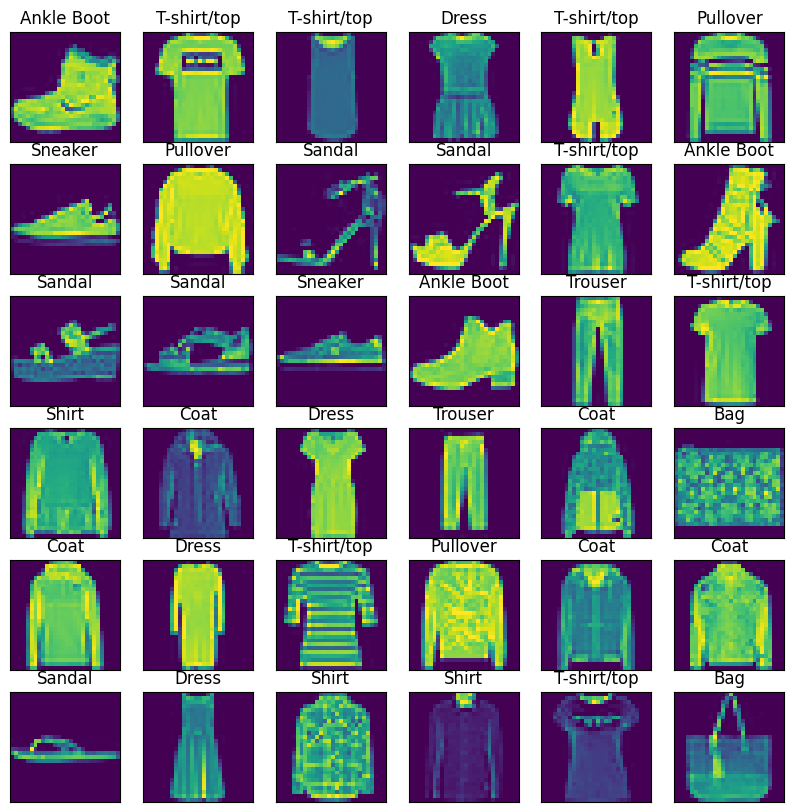

In [20]:
#create a  dictionary for each type of label

labels = {0: "T-shirt/top", 1: "Trouser", 2:"Pullover",3:"Dress", 4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",
          8:"Bag",9:"Ankle Boot"}

plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape((IMG_ROWS,IMG_COLS)))
  label_index=train_labels[i]
  plt.title(labels[label_index])
plt.show()

In [21]:
#one hot representation of labels

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [22]:
#defining the architecture of models

class cnn_fmnist:
  @staticmethod
  def build(input_shape, classes):

    model= Sequential([

        Conv2D(32, kernel_size=(3,3), activation='relu', padding='same',input_shape=input_shape),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),

        Dense(1024,activation='relu'),
        Dense(512, activation='relu'),
        Dense(NUM_CLASSES,activation='softmax')



    ])
    return model

In [24]:
#initial optimizer

model= cnn_fmnist.build(input_shape= INPUT_SHAPE, classes = NUM_CLASSES)

#compile the model
model.compile(optimizer= 'Adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)        

In [25]:
#trainning the model

BATCH_SIZE = 128
EPOCHS = 50
VALIDATION_SPLIT = 0.2 #how much of the training set is reserved for validation


In [26]:
history=model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 8s 8ms/step - loss: 0.5225 - accuracy: 0.8082 - val_loss: 0.3757 - val_accuracy: 0.8618
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.3058 - accuracy: 0.8867 - val_loss: 0.2922 - val_accuracy: 0.8907
Epoch 3/50
375/375 [==============================] - 3s 8ms/step - loss: 0.2534 - accuracy: 0.9064 - val_loss: 0.2519 - val_accuracy: 0.9084
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2215 - accuracy: 0.9187 - val_loss: 0.2319 - val_accuracy: 0.9153
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1950 - accuracy: 0.9287 - val_loss: 0.2310 - val_accuracy: 0.9168
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1729 - accuracy: 0.9352 - val_loss: 0.2323 - val_accuracy: 0.9188
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1536 - accuracy: 0.9425 - val_loss: 0.2460 - val_accuracy: 0.9163
Epoch 

In [27]:
score = model.evaluate(test_images, test_labels)
print("\n Testscore: ", score[0])
print('Test accuracy: ', score[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.6038 - accuracy: 0.9164

 Testscore:  0.6038014888763428
Test accuracy:  0.9164000153541565


Text(0.5, 1.0, 'Train - Accuracy')

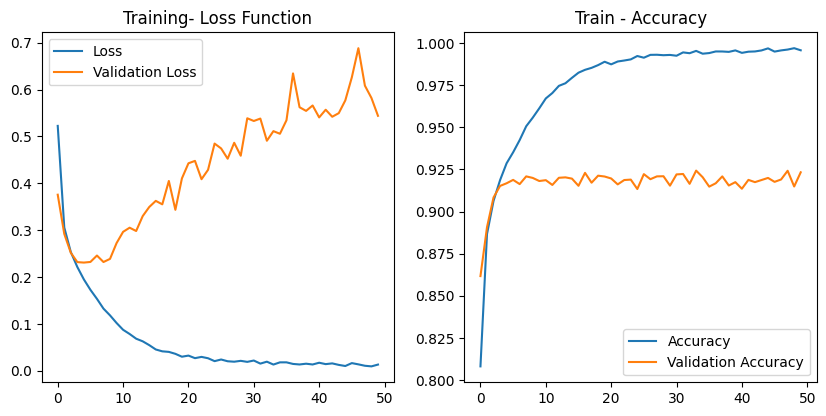

In [28]:
#plot the loss and accuracy functions for the training and validation sets

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training- Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [29]:
#get the predictions for the test data , convert to an integer cvalue between 0 and 9

predicted_classes = np.around(model.predict(test_images))
predicted_classes= np.argmax(predicted_classes,axis=1)

#get the indeces to be plotted
if test_labels.ndim==2:
  test_labels = np.argmax(test_labels,axis=1)

correct = np.nonzero(predicted_classes==test_labels)[0]
incorrect = np.nonzero(predicted_classes!= test_labels)[0]

313/313 [==============================] - 1s 2ms/step


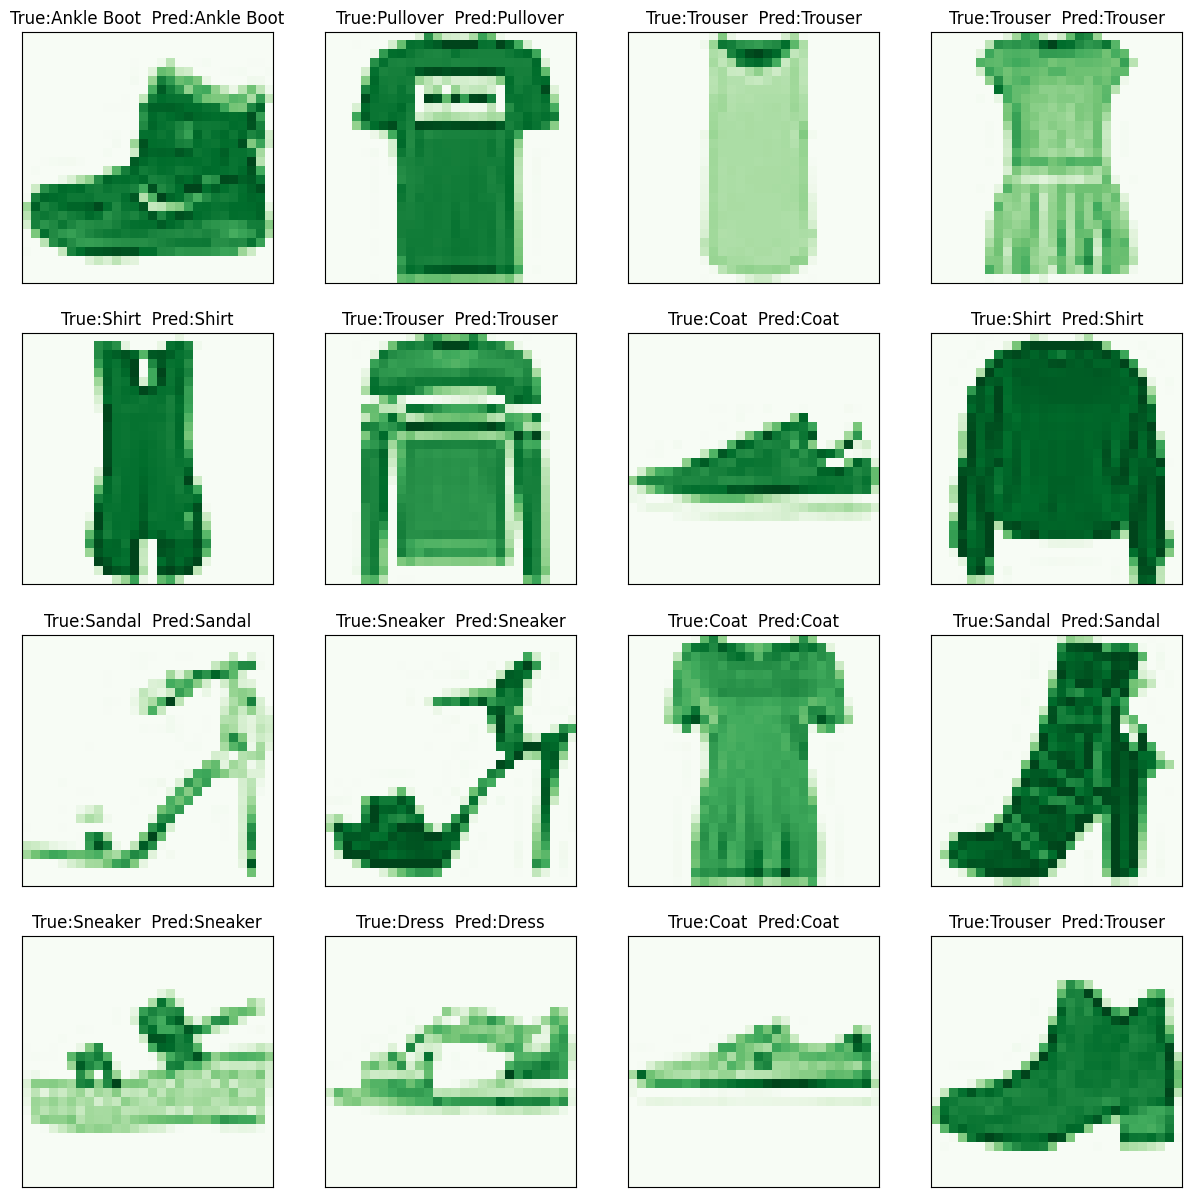

In [30]:
#correctly predicted
plt.figure(figsize=(15,15))
for i, indx in enumerate(correct[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[indx].reshape((IMG_ROWS,IMG_COLS)),cmap="Greens")
  label_index=train_labels[indx]
  plt.title("True:{}  Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))
plt.show()

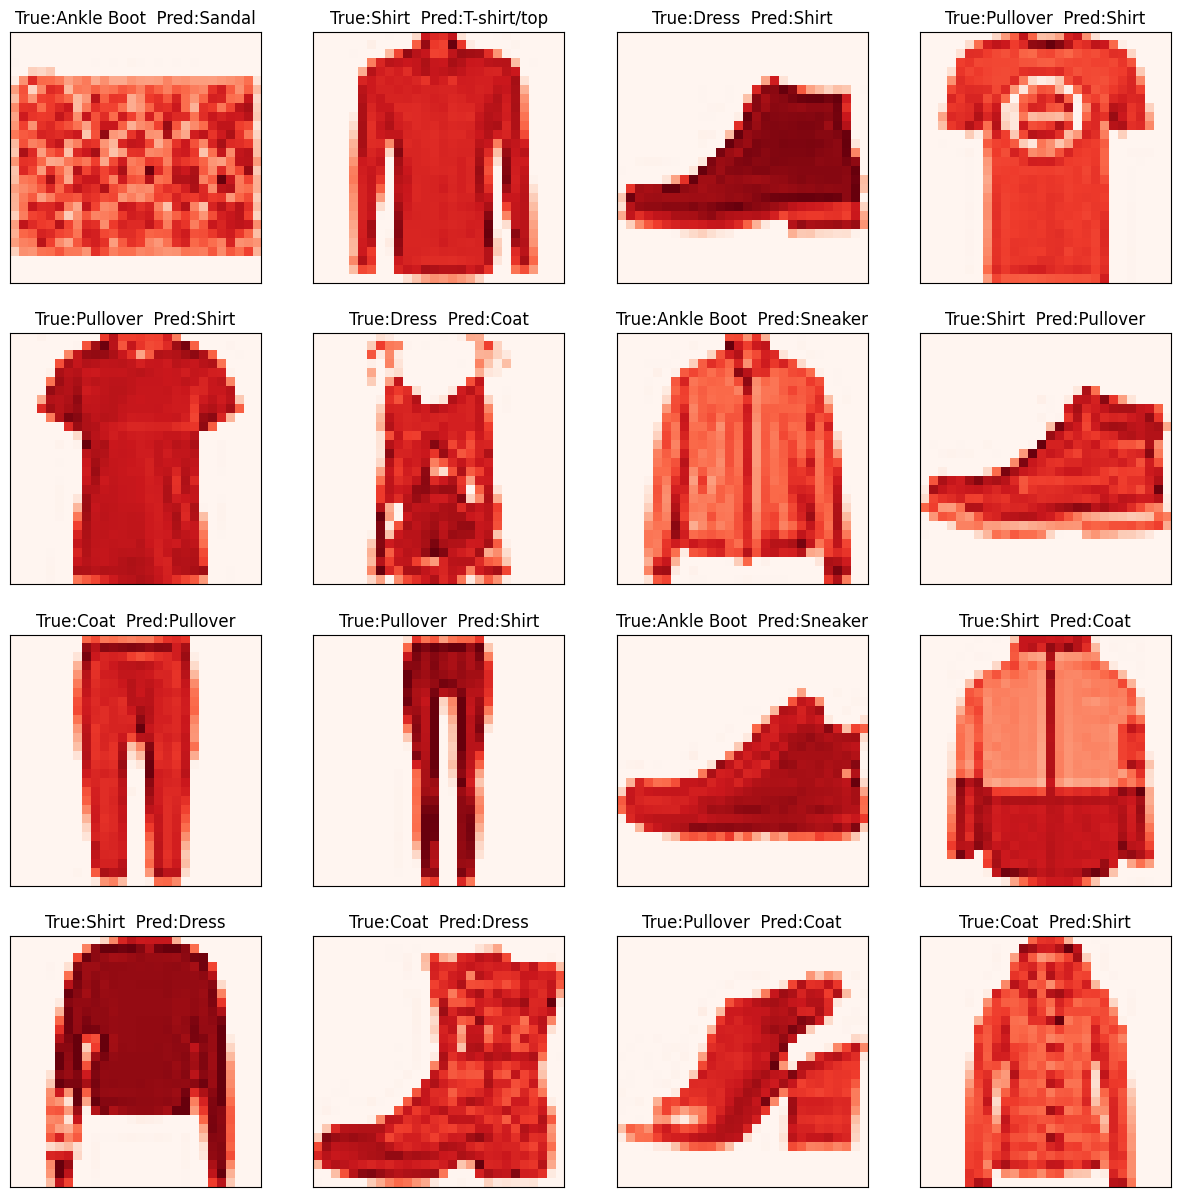

In [31]:
#incorrectly predicted

plt.figure(figsize=(15,15))
for i, indx in enumerate(incorrect[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[indx].reshape((IMG_ROWS,IMG_COLS)),cmap="Reds")
  label_index=train_labels[indx]
  plt.title("True:{}  Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))
plt.show()